In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot(network_history):
    plt.figure()
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='upper right')
    
    plt.figure()
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='lower left')
    plt.show()


def metrics_best(path, X_val, Y_true):
    best_model = load_model(path)
    Y_pred = best_model.predict(X_val)
    print(confusion_matrix(Y_true, np.where(Y_pred>0.5,1,0)))
    print(classification_report(Y_true, np.where(Y_pred>0.5,1,0)))

In [3]:
iris_dataset = np.loadtxt("iris.txt")
X, Y = iris_dataset[:, 0: 4], iris_dataset[:, -1]
print(X.shape, Y.shape)

(100, 4) (100,)


In [4]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X, encoded_Y, train_size=0.74, random_state=42, stratify=encoded_Y)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [7]:
model = Sequential()
model.add(Dense(1, input_dim=4, activation='sigmoid',use_bias=False))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [8]:
filepath="Models\\weights.best.4param.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=0, mode='min')
callbacks_list = [checkpoint, early_stopping]

In [9]:
n_epochs = 35
network_history = model.fit(X_train, Y_train, batch_size=len(X_val), epochs=n_epochs, callbacks=callbacks_list, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/35
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/3 [=========>....................] - ETA: 0s - loss: 0.7615 - accuracy: 0.4615WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000024A261400D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 1s 272ms/step - loss: 0.7743 - accuracy: 0.4557 - val_loss: 0.8064 - val_accuracy: 0.3846

Epoch 00001: val_accuracy improved from -inf to 0.38462, saving model to Models\weights.best.4param.hdf5
Epoch 2/35
3/3 [==============================] - 0s 22ms/step - loss: 0.7935 - accuracy: 0.4576 - val_loss: 0.8010 - val_accuracy: 0.3846

Epoch 00002: val_accuracy did not improve from 0.38462
Epoch 3/35
3/3 [==============================] - 0s 23ms/step - loss: 0.7562 - accuracy: 0.4769 - val_loss: 0.7957 - val_accuracy: 0.3846

Epoch 00003: val_accuracy did not improve from 0.38462
Epoch 4/35
3/3 [==============================] - 0s 22ms/

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[9 4]
 [7 6]]
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       0.60      0.46      0.52        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



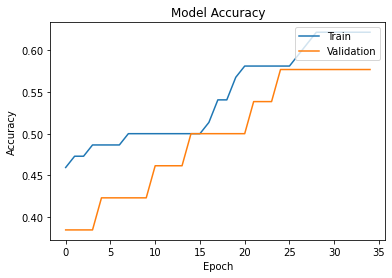

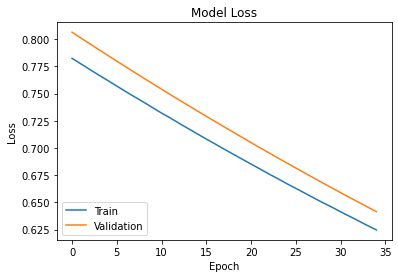

In [10]:
path="Models\\weights.best.4param.hdf5"
#Y_val_no_encoded = np.where(Y_val<0,0,Y_val_no_encoded)
metrics_best(path,X_val,Y_val)
plot(network_history)